Original rows: 1465
Rows after cleaning: 1462
Train size: 1169
Test size: 293

Training model: Linear Regression

Training model: Random Forest

Training model: KNN Regression

=== Model Performance on Test Set ===

Linear Regression:
  MAE  = 0.1877
  RMSE = 0.2555
  R²   = 0.2023

Random Forest:
  MAE  = 0.1592
  RMSE = 0.2348
  R²   = 0.3260

KNN Regression:
  MAE  = 0.1879
  RMSE = 0.2544
  R²   = 0.2086

=== Model Performance on Test Set ===

Linear Regression:
  MAE  = 0.1877
  RMSE = 0.2555
  R²   = 0.2023

Random Forest:
  MAE  = 0.1592
  RMSE = 0.2348
  R²   = 0.3260

KNN Regression:
  MAE  = 0.1879
  RMSE = 0.2544
  R²   = 0.2086


Model comparison table:
                        MAE      RMSE        R2
Linear Regression  0.187699  0.255450  0.202271
Random Forest      0.159191  0.234804  0.326008
KNN Regression     0.187918  0.254432  0.208614


<Figure size 800x500 with 0 Axes>

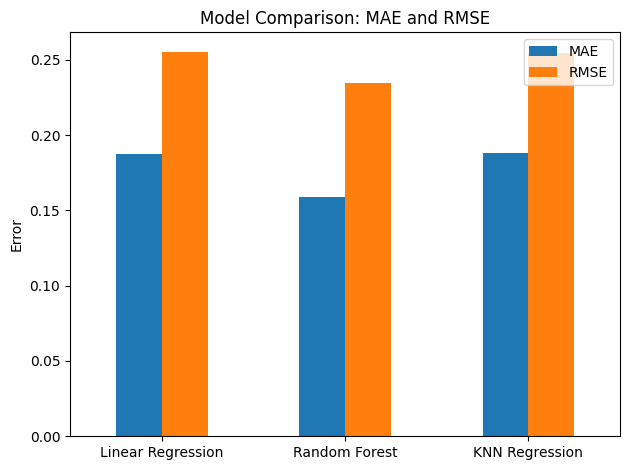

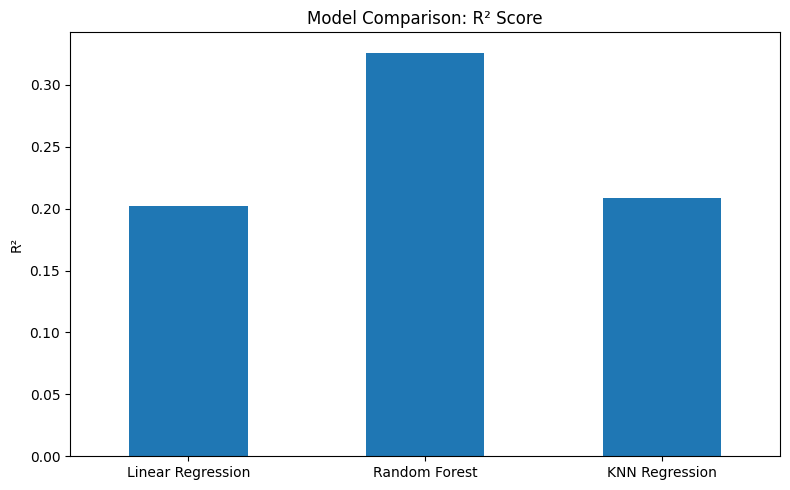

In [4]:
###############################
# 1. Imports
###############################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

###############################
# 2. Load data
###############################
df = pd.read_csv("amazon.csv")

###############################
# 3. Clean and prepare numeric columns
###############################
df["discounted_price_num"] = (
    df["discounted_price"]
    .str.replace("₹", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)

df["actual_price_num"] = (
    df["actual_price"]
    .str.replace("₹", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)

df["discount_percentage_num"] = (
    df["discount_percentage"]
    .str.replace("%", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)

df["rating_count_num"] = (
    df["rating_count"]
    .str.replace(",", "", regex=False)
    .str.strip()
)

# Convert to numeric
num_cols = [
    "discounted_price_num",
    "actual_price_num",
    "discount_percentage_num",
    "rating_count_num",
]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

###############################
# 4. Clean target variable (rating)
###############################
df["rating_num"] = pd.to_numeric(df["rating"], errors="coerce")

# OPTION A — Drop missing or invalid values
df_clean = df.dropna(subset=["rating_num"] + num_cols).copy()

print("Original rows:", df.shape[0])
print("Rows after cleaning:", df_clean.shape[0])

###############################
# 5. Define features and target
###############################
feature_cols_num = num_cols
feature_cols_cat = ["category"]

X = df_clean[feature_cols_num + feature_cols_cat]
y = df_clean["rating_num"]

###############################
# 6. Train/Test split
###############################
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

###############################
# 7. Preprocessing pipeline
###############################
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), feature_cols_num),
        ("cat", OneHotEncoder(handle_unknown="ignore"), feature_cols_cat),
    ]
)

###############################
# 8. Define models
###############################
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ),
    "KNN Regression": KNeighborsRegressor(n_neighbors=5),
}

###############################
# 9. Fit models and evaluate
###############################
results = {}
predictions = {}        # store y_pred for each model
fitted_pipes = {}       # store fitted pipelines for each model

for name, model in models.items():
    print(f"\nTraining model: {name}")
    
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model),
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    # store for later use
    predictions[name] = y_pred
    fitted_pipes[name] = pipe
    
    # metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2,
    }

###############################
# 10. Print results
###############################
print("\n=== Model Performance on Test Set ===")
for name, metrics_ in results.items():
    print(f"\n{name}:")
    print(f"  MAE  = {metrics_['MAE']:.4f}")
    print(f"  RMSE = {metrics_['RMSE']:.4f}")
    print(f"  R²   = {metrics_['R2']:.4f}")


###############################
# 10. Print results
###############################
print("\n=== Model Performance on Test Set ===")
for name, metrics_ in results.items():
    print(f"\n{name}:")
    print(f"  MAE  = {metrics_['MAE']:.4f}")
    print(f"  RMSE = {metrics_['RMSE']:.4f}")
    print(f"  R²   = {metrics_['R2']:.4f}")

    ###############################
# 11. Model comparison plots
###############################
metrics_df = pd.DataFrame(results).T  # rows = models, cols = MAE/RMSE/R2
print("\n\nModel comparison table:")
print(metrics_df)

# Bar plot for MAE and RMSE
plt.figure(figsize=(8, 5))
metrics_df[["MAE", "RMSE"]].plot(kind="bar")
plt.title("Model Comparison: MAE and RMSE")
plt.ylabel("Error")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Bar plot for R²
plt.figure(figsize=(8, 5))
metrics_df["R2"].plot(kind="bar")
plt.title("Model Comparison: R² Score")
plt.ylabel("R²")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()





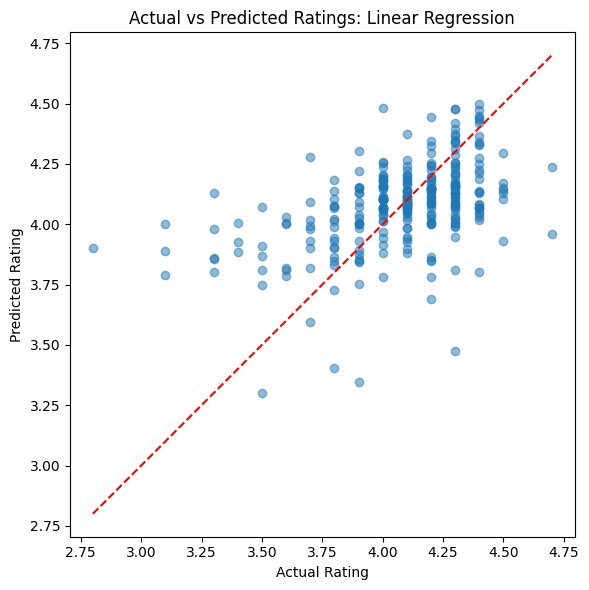

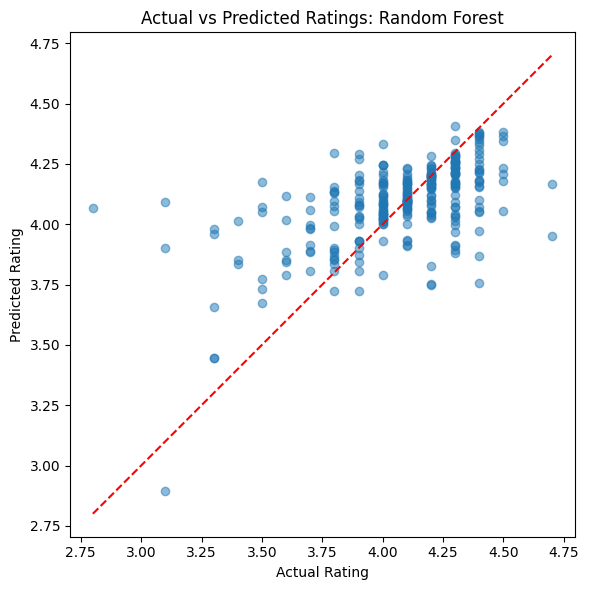

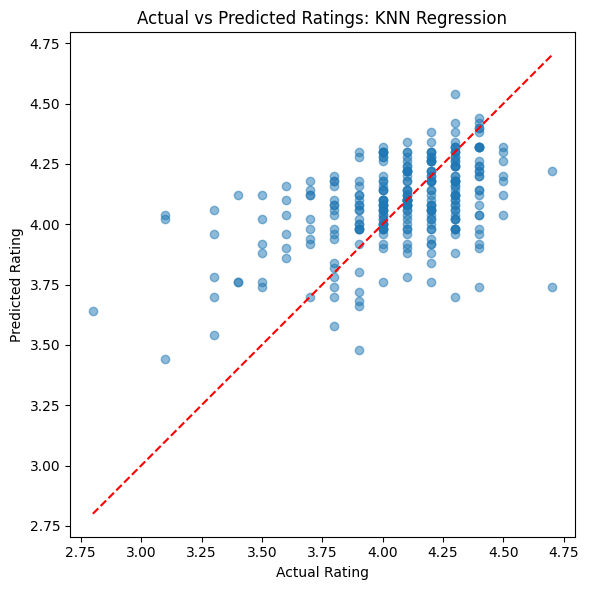

In [5]:
###############################
# 12. Actual vs Predicted plots
###############################
y_test_array = y_test.values  # ensure it's a NumPy array

min_rating = min(
    y_test_array.min(),
    min(pred.min() for pred in predictions.values())
)
max_rating = max(
    y_test_array.max(),
    max(pred.max() for pred in predictions.values())
)

for name, y_pred in predictions.items():
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test_array, y_pred, alpha=0.5)
    plt.plot([min_rating, max_rating], [min_rating, max_rating], "r--")
    plt.xlabel("Actual Rating")
    plt.ylabel("Predicted Rating")
    plt.title(f"Actual vs Predicted Ratings: {name}")
    plt.tight_layout()
    plt.show()



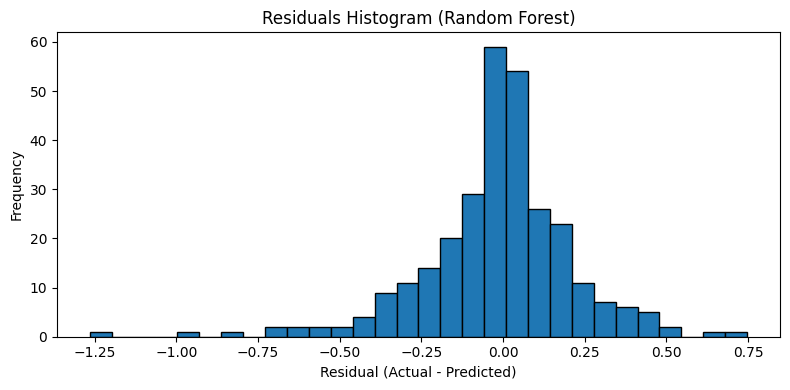

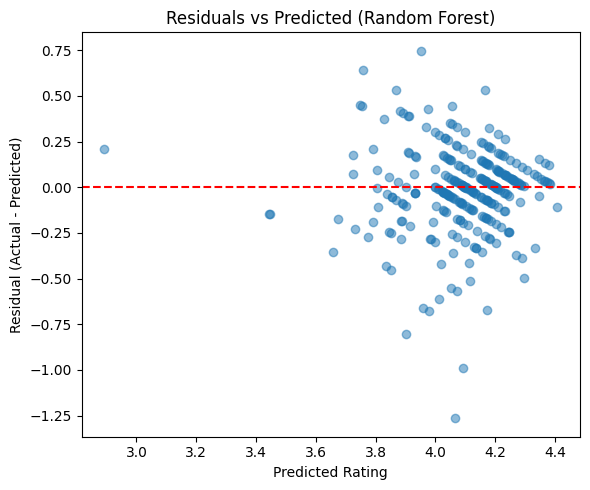


Top 15 important features for Random Forest:
                                               feature  importance
3                                num__rating_count_num    0.251607
2                         num__discount_percentage_num    0.120293
0                            num__discounted_price_num    0.117079
1                                num__actual_price_num    0.117010
92   cat__category_Electronics|HomeTheater,TV&Video...    0.033071
171  cat__category_Home&Kitchen|Kitchen&HomeApplian...    0.028074
154  cat__category_Home&Kitchen|Kitchen&HomeApplian...    0.019999
77   cat__category_Electronics|Headphones,Earbuds&A...    0.018418
157  cat__category_Home&Kitchen|Kitchen&HomeApplian...    0.016119
13   cat__category_Computers&Accessories|Accessorie...    0.013088
21   cat__category_Computers&Accessories|Accessorie...    0.012699
116  cat__category_Electronics|WearableTechnology|S...    0.008482
51   cat__category_Computers&Accessories|Networking...    0.008014
185  cat__catego

C:\Users\Nathaniel Paul HP\AppData\Local\Temp\ipykernel_21268\3203118826.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


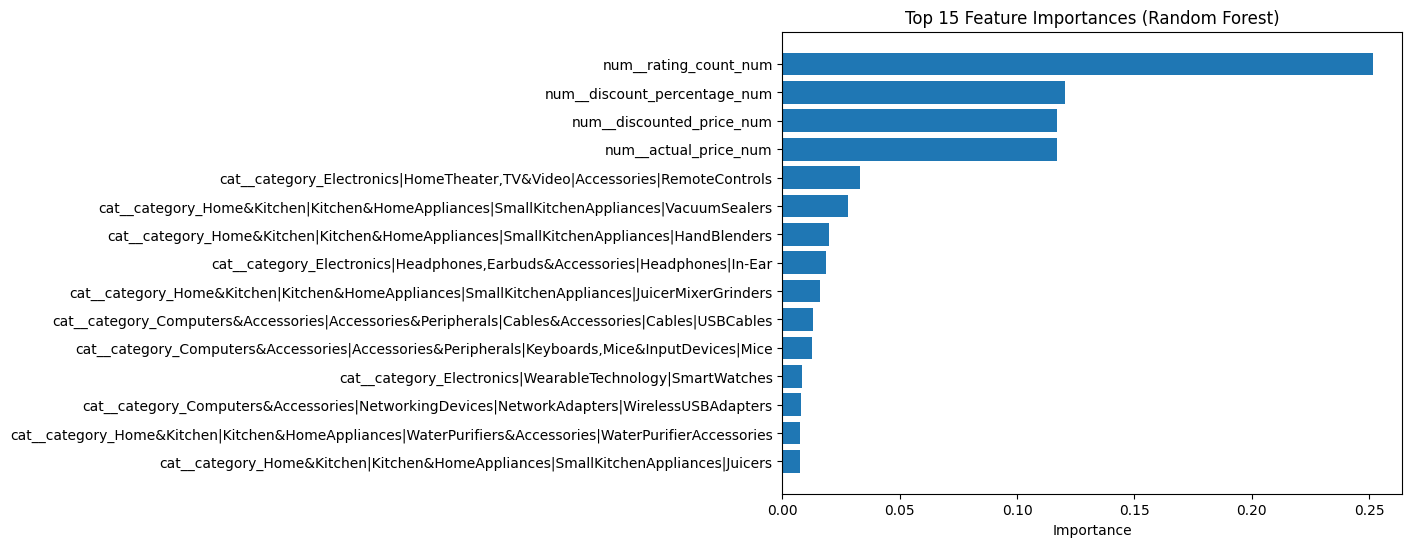

In [6]:
###############################
# 13. Residual analysis for Random Forest
###############################
best_model_name = "Random Forest"
y_pred_rf = predictions[best_model_name]
residuals_rf = y_test_array - y_pred_rf

# Histogram of residuals
plt.figure(figsize=(8, 4))
plt.hist(residuals_rf, bins=30, edgecolor="black")
plt.title("Residuals Histogram (Random Forest)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Residuals vs predicted
plt.figure(figsize=(6, 5))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Rating")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted (Random Forest)")
plt.tight_layout()
plt.show()

###############################
# 14. Feature importance (Random Forest)
###############################
rf_pipe = fitted_pipes["Random Forest"]
rf_model = rf_pipe.named_steps["model"]
preprocess = rf_pipe.named_steps["preprocess"]

# Get feature names after preprocessing (numeric + one-hot categories)
feature_names = preprocess.get_feature_names_out()
importances = rf_model.feature_importances_

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

print("\nTop 15 important features for Random Forest:")
print(fi_df.head(15))

plt.figure(figsize=(8, 6))
plt.barh(fi_df["feature"].head(15)[::-1], fi_df["importance"].head(15)[::-1])
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
    